In this notebook we take a look at the three SIR-f from the paper

Perra N, Balcan D, Gonc¸alves B, Vespignani A (2011) *Towards a Characterization of Behavior-Disease Models*. PLoS ONE 6(8): e23084. doi:10.1371/journal.pone.0023084

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0023084


1) **Local, prevalence-based spread of the fear of the disease**<br>
Susceptible individuals will adopt behavioral changes only if they interact with infectious individuals

2) **Global, prevalence-based spread of the fear of the disease**<br>
Individuals adopt self-induced behavioral changes because of information that is publicly available, generally through newspapers, television, and the Internet.

3) **Local, belief-based spread of the fear of the disease**<br>
In addition to the local prevalence-based spread of the fear of the disease, in this case we assume that the fear contagion may also occur by contacting individuals who have already acquired fear/awareness of the disease.

In [ ]:
!pip install ipywidgets
!pip install tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from ipywidgets import interact, fixed, interact_manual
import ipywidgets
from tqdm import tqdm

from scipy.signal import argrelextrema
from itertools import product


rcParams['figure.figsize'] = 12,7
color_map = ["tab:blue", "tab:cyan", "tab:red", "tab:green"]

## Deterministic models

In [ ]:
def deterministic_simulation(plot, model, R_0, beta_F, r_b, mu, mu_F, R0, S_F0, I0, N, T, delta, alpha):

    ### function that simulate SIR with fear deterministically

    dt = 0.1
    q = int(T/dt)
    time = np.arange(q)*dt
    beta = mu*R_0

    S = np.zeros(q)
    S_F = np.zeros(q)
    I = np.zeros(q)
    R = np.zeros(q)

    S[0] = N - R0 - S_F0 - I0
    S_F[0] = S_F0
    I[0] = I0
    R[0] = R0

    for t in range(q-1):

        if model==1:
            S[t+1] = S[t] + (1/N)*(- beta*S[t]*I[t] - beta_F*S[t]*I[t] + mu_F*S_F[t]*(S[t]+R[t]))*dt
            S_F[t+1] = S_F[t] + (1/N)*(- r_b*beta*S_F[t]*I[t] + beta_F*S[t]*I[t] - mu_F*S_F[t]*(S[t]+R[t]))*dt
        elif model==2:
            S[t+1] = S[t] + (1/N)*(-beta*S[t]*I[t] - beta_F*S[t]*(1-np.exp(-delta*I[t]))*N + mu_F*S_F[t]*(S[t]+R[t]))*dt
            S_F[t+1] = S_F[t] + (1/N)*(-r_b*beta*S_F[t]*I[t] + beta_F*S[t]*(1-np.exp(-delta*I[t]))*N - mu_F*S_F[t]*(S[t]+R[t]))*dt
        elif model==3:
            S[t+1] = S[t] + (1/N)*(-beta*S[t]*I[t] - beta_F*S[t]*(I[t]+alpha*S_F[t]) + mu_F*S_F[t]*(S[t]+R[t]))*dt
            S_F[t+1] = S_F[t] + (1/N)*(-r_b*beta*S_F[t]*I[t] + beta_F*S[t]*(I[t]+alpha*S_F[t]) - mu_F*S_F[t]*(S[t]+R[t]))*dt

        I[t+1] = I[t] + (-mu*I[t] + (1/N)*(beta*S[t]*I[t] + r_b*beta*S_F[t]*I[t]))*dt
        R[t+1] = R[t] + (mu*I[t])*dt

    if plot=='one': # curves plot
        plt.plot(time, I/N, label="i", c='tab:red')
        plt.plot(time, S_F/N, label="s_f", c='tab:cyan')
        plt.plot(time, S/N, label="s", c='tab:blue')
        plt.plot(time, R/N, label="r", c='tab:green')
        plt.title('model '+str(model), fontsize=14)
        plt.legend()
        plt.grid()

    if plot=='two': # stackplot
        plt.stackplot(time, S/N, S_F/N, I/N, R/N, labels=['S', 'S_F', 'I', 'R'], colors=color_map)
        plt.title('Model '+str(model), fontsize=20)
        plt.xlabel('time (days)', fontsize = 15)
        plt.ylabel('fraction of the population', fontsize = 15)
        plt.legend(fontsize = 12)

    if plot=='three': # only prevalence plot
        plt.plot(time, I/N, label="i", c='tab:red')

        plt.title('model '+str(model), fontsize=14)
        plt.legend()
        plt.grid()

    number_of_peaks = len(argrelextrema(I, np.greater)[0])
    return R_0, beta_F, number_of_peaks, r_b, R[-1]

In [ ]:
# model parameters

model = 1

if model==1:
    R_0 = 2
    mu = 0.1
    beta_F = 3
    mu_F = 0.1
    r_b = 0.1
    delta = 0
    alpha = 0

elif model==2:
    R_0 = 2
    mu = 0.1
    beta_F = 3
    mu_F = 0.1
    r_b = 0.1
    delta = 0.1
    alpha = 0

elif model==3:
    R_0 = 2.3
    mu = 0.4
    R_F = 2
    mu_F = 0.5
    r_b = 0.4
    delta = 0
    #alpha = 0.4
    alpha = 0.05
    beta_F = mu_F*R_F/alpha

R0 = 0  # initially recovered
S_F0 = 0  # initially feared
I0 = 1  # initially infected
N = 10**6 # population
T = 1000 # simulation time

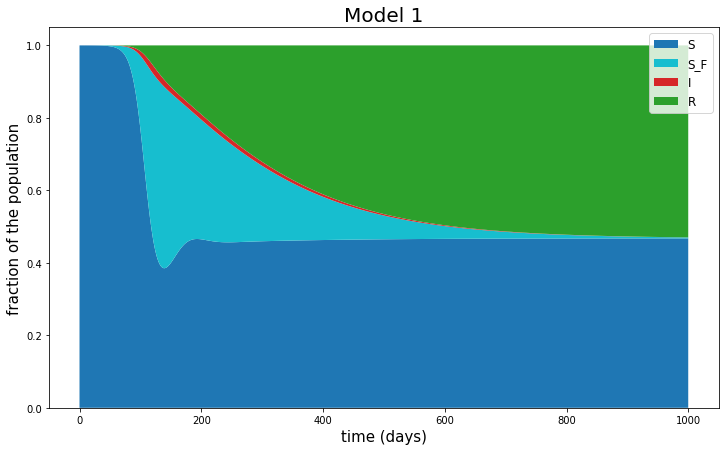

In [ ]:
plot = 'two'
row = deterministic_simulation(plot, model, R_0, beta_F, r_b, mu, mu_F, R0, S_F0, I0, N, T, delta, alpha)

In [ ]:
interact(deterministic_simulation,
         plot = [('time-series', 'one'), ('stackplot', 'two'),('time-series-onlyI', 'three')],
         model = [('1) local prevalence-based', 1),
                 ('2) global prevalence-based', 2),
                 ('3) local belief-based', 3)],
         R_0 = ipywidgets.FloatSlider(min=0, max=6, step=0.05, value=R_0, description=r"$R_0$"),
         beta_F = ipywidgets.FloatSlider(min=0, max=100, step=0.5, value=beta_F, description=r"$\beta_F$"),
         r_b = ipywidgets.FloatSlider(min=0, max=1, step=0.05, value=r_b, description=r"$r_{\beta}$"),
         mu = ipywidgets.FloatSlider(min=0, max=0.5, step=0.1, value=mu, description=r"$\mu$"),
         mu_F = ipywidgets.FloatSlider(min=0, max=0.6, step=0.1, value=mu_F, description=r"$\mu_F$"),
         R0 = fixed(R0),
         S_F0 = fixed(S_F0),
         I0 = fixed(I0),
         N = fixed(N),
         T = ipywidgets.FloatSlider(min=100, max=1000, step=100, value=T, description=r"$T$"),
         delta = ipywidgets.FloatSlider(min=0, max=0.0007, step=0.000001, value=delta, description=r"$\delta$"),
         alpha = ipywidgets.FloatSlider(min=0, max=1, step=0.01, value=alpha, description=r"$\alpha$"))

interactive(children=(Dropdown(description='plot', options=(('time-series', 'one'), ('stackplot', 'two'), ('ti…

<function __main__.deterministic_simulation(plot, model, R_0, beta_F, r_b, mu, mu_F, R0, S_F0, I0, N, T, delta, alpha)>

## Stochastic models

In [ ]:
def simulate_stochastic(plot, model, R_0, beta_F, r_b, mu, mu_F, R0, S_F0, I0, N, T, delta, alpha):

    ### function that simulate SIR with fear stochasticly

    beta = mu*R_0
    dt = 1
    q = int(T/dt)
    time = np.arange(q)*dt

    S = np.zeros(q)
    S_F = np.zeros(q)
    I = np.zeros(q)
    R = np.zeros(q)

    S[0] = N - R0 - S_F0 - I0
    S_F[0] = S_F0
    I[0] = I0
    R[0] = R0

    for t in range(q-1):

        FOI = beta*I[t]/N
        FOI_F = r_b*beta*I[t]/N

        if model==1:
            rate_scare = beta_F*I[t]/N
        elif model==2:
            rate_scare = beta_F*(1-np.exp(-delta*I[t])) #indep on N
        elif model==3:
            rate_scare = beta_F*alpha*S_F[t]/N

        rate_relief = mu_F*(S[t]+R[t])/N

        infected = np.random.binomial(S[t], FOI)
        infected_F = np.random.binomial(S_F[t], FOI_F)
        scared = np.random.binomial(S[t], rate_scare)
        relieved = np.random.binomial(S_F[t], rate_relief)
        recovered= np.random.binomial(I[t], mu)

        S[t+1] = S[t] - infected - scared + relieved
        S_F[t+1] = S_F[t] - infected_F + scared - relieved
        I[t+1] = I[t] - recovered + infected + infected_F
        R[t+1] = R[t] + recovered


    if plot=='one': # curves plot
        plt.plot(time, I/N, label="i", c='tab:red')
        plt.plot(time, S_F/N, label="s_f", c='tab:cyan')
        plt.plot(time, S/N, label="s", c='tab:blue')
        plt.plot(time, R/N, label="r", c='tab:green')
        plt.title('model '+str(model), fontsize=14)
        plt.legend()
        plt.grid()

    if plot=='two': # stackplot
        plt.stackplot(time, S/N, S_F/N, I/N, R/N, labels=['S', 'S_F', 'I', 'R'], colors=color_map)
        plt.title('model '+str(model), fontsize=14)
        plt.legend()

    elif plot=='three': # prevalence only
        plt.plot(time, I/N, label="i", c='tab:red')

        plt.title('model '+str(model), fontsize=14)
        plt.legend()
        plt.grid()

In [ ]:
interact(simulate_stochastic,
         plot = [('time-series', 'one'), ('stackplot', 'two'), ('time-series-onlyI', 'three')],
         model = [('1) local prevalence-based', 1),
                 ('2) global prevalence-based', 2),
                 ('3) local belief-based', 3)],
         R_0 = ipywidgets.FloatSlider(min=0, max=6, step=0.1, value=R_0, description=r"$R_0$"),
         r_b = ipywidgets.FloatSlider(min=0, max=1, step=0.05, value=r_b, description=r"$r_{\beta}$"),
         mu = ipywidgets.FloatSlider(min=0, max=0.5, step=0.1, value=mu, description=r"$\mu$"),
         mu_F = ipywidgets.FloatSlider(min=0, max=0.6, step=0.1, value=mu_F, description=r"$\mu_F$"),
         beta_F = ipywidgets.FloatSlider(min=0, max=30, step=0.5, value=beta_F, description=r"$\beta_F$"),
         R0 = fixed(5),
         S_F0 = fixed(S_F0),
         I0 = fixed(I0),
         N = fixed(N),
         T = ipywidgets.FloatSlider(min=100, max=1000, step=100, value=T, description=r"$T$"),
         delta = ipywidgets.FloatSlider(min=0, max=0.0007, step=0.000001, value=delta, description=r"$\delta$"),
         alpha = ipywidgets.FloatSlider(min=0, max=1, step=0.01, value=alpha, description=r"$\alpha$"))

interactive(children=(Dropdown(description='plot', options=(('time-series', 'one'), ('stackplot', 'two'), ('ti…

<function __main__.simulate_stochastic(plot, model, R_0, beta_F, r_b, mu, mu_F, R0, S_F0, I0, N, T, delta, alpha)>

### Phase diagram of infection waves on $R_{0}$-$\beta_{F}$ plane

In [ ]:
#Create dataframes with tha data from model 1 and 3 to be used for the plots

# model parameters
R0 = 0  # initially recovered
S_F0 = 0  # initially feared
I0 = 1  # initially infected
N = 10**6 # population
T = 500 # simulation time

In [ ]:
#model 1

model = 1
r_b_ = [0,0.15,0.3]
R_0_ = np.linspace(1.1, 6, 100)
beta_F_ = np.linspace(0, 10, 100)
cmb = list(product(R_0_, beta_F_)) #all combinations of R_0 and R_F
mu = 0.1
mu_F = 0.1
alpha = 0
delta = 0

data1 = []
for r_b in tqdm(r_b_):
  for R_0, beta_F in cmb:
    row = deterministic_simulation(4,model, R_0, beta_F, r_b, mu, mu_F, R0, S_F0, I0, N, T, delta, alpha)
    data1.append(row)
df1 = pd.DataFrame(data1, columns=['R0', 'beta_F', 'number of peaks', 'r_b', 'R_inf'])


100%|██████████| 3/3 [17:12<00:00, 344.10s/it]


In [ ]:
#model 3

model = 3
beta_F_ = np.linspace(0, 30, 100)
cmb = list(product(R_0_, beta_F_))
mu = 0.4
mu_F = 0.5
alpha = 0.05
delta = 0

data3 = []
for r_b in tqdm(r_b_):
  for R_0, beta_F in cmb:

    row = deterministic_simulation(4,model, R_0, beta_F, r_b, mu, mu_F, R0, S_F0, I0, N, T, delta, alpha)
    data3.append(row)
df3 = pd.DataFrame(data3, columns=['R0', 'beta_F', 'number of peaks', 'r_b', 'R_inf'])

100%|██████████| 3/3 [18:09<00:00, 363.18s/it]


In [ ]:
def number_of_peaks_plot (model, df, r_b):
  df1 = df[df['r_b']==r_b]

  if model==1:
    if r_b==0:
      n = 4
    if r_b==0.15:
      n = 3
    if r_b==0.3:
      n = 2

  if model==3:
    n = 3 #always 3 peaks

  cmap = plt.get_cmap('viridis', n)

  plt.scatter(x=df1['R0'], y=df1['beta_F'], c=df1['number of peaks'], s=30, marker ="s", cmap=cmap)
  plt.xlabel('$R_0$', size=12)
  plt.ylabel(r'$\beta_F$', size=12)

  ax = plt.gca()

  if model == 1:
    ax.set_ylim([0, 10])
    ax.set_xlim([1.25, 6])
  elif model == 3:
    ax.set_ylim([0, 30])
    ax.set_xlim([1.1, 6])

  cbar=plt.colorbar(ticks=range(n+1))
  cbar.ax.tick_params(axis='y', direction='inout')
  cbar.ax.set_ylabel('Number of disease activity peaks', size=12)

  plt.title(r"Model $%i$: $r_{\beta} = %1.2f$" %(model,r_b))

  plt.show()

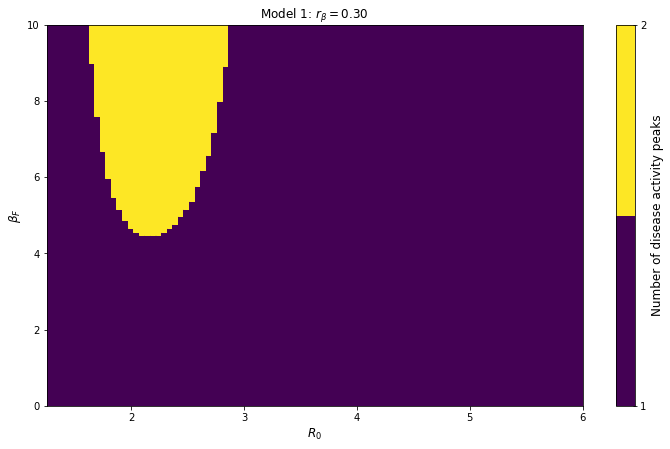

In [ ]:
number_of_peaks_plot (1, df1[df1['number of peaks']>0], 0.3)

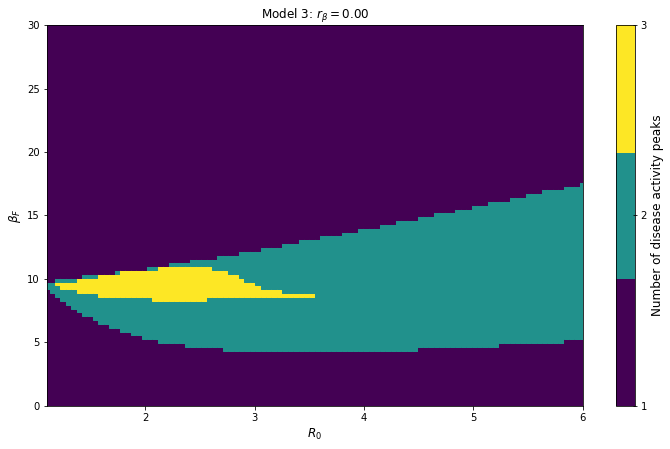

In [ ]:
number_of_peaks_plot (3, df3, 0)

### Phase diagram of total infections in $R_{0}$-$R_{F}$ plane (model 3)

In [ ]:
# model parameters
model = 3
R0 = 0  # initially recovered
S_F0 = 0  # initially feared
I0 = 1  # initially infected
N = 10**6 # population
T = 1000 # simulation time

mu = 0.4
mu_F = 0.5
alpha = 0.05
delta = 0
alpha = 0.05
r_b = 0.4

R_0_ = np.linspace(0, 4, 100)
R_F_ = np.linspace(0, 3, 100)
beta_F_ = mu_F*R_F_/alpha

X, Y = np.meshgrid(R_F_, R_0_)

In [ ]:
z = np.zeros((100,100))
for i, beta_f in enumerate(tqdm(beta_F_)):
    for j, r0 in  enumerate(R_0_):
        row = deterministic_simulation(4, model, r0, beta_f, r_b, mu, mu_F, R0, S_F0, I0, N, T, delta, alpha)
        z[j,i] = row[4]/N  # one has to invert the axes for some reason

100%|██████████| 100/100 [11:49<00:00,  7.10s/it]


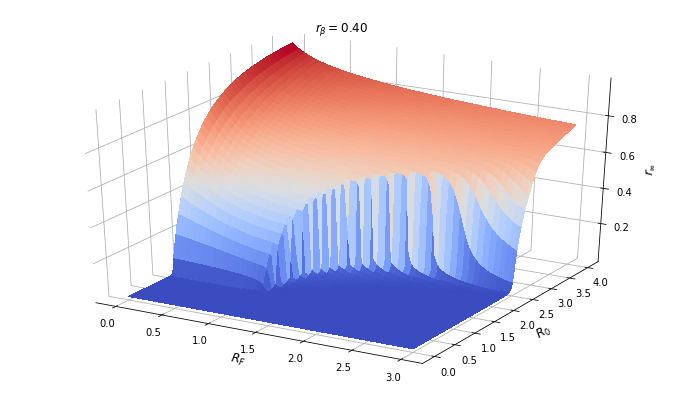

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, z, cmap='coolwarm', linewidth=0, antialiased=False)
ax.set_title(r"$r_{\beta} = %1.2f$" % r_b)
ax.set_xlabel('$R_F$', size=12)
ax.set_ylabel('$R_0$', size=12)
ax.set_zlabel(r'$r_{\infty}$', size=12)

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

Text(0, 0.5, '$R_0$')

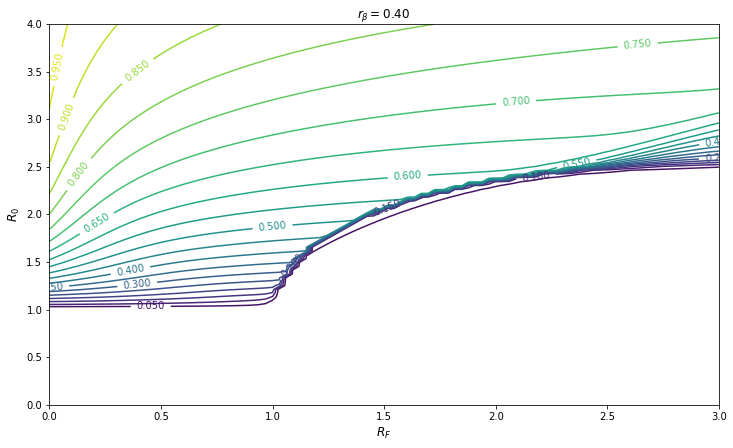

In [ ]:
fig, ax = plt.subplots()
cs = ax.contour(X, Y, z, levels=20)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_title(r"$r_{\beta} = %1.2f$" % r_b)
ax.set_xlabel('$R_F$', size=12)
ax.set_ylabel('$R_0$', size=12)

Text(0, 0.5, '$R_0$')

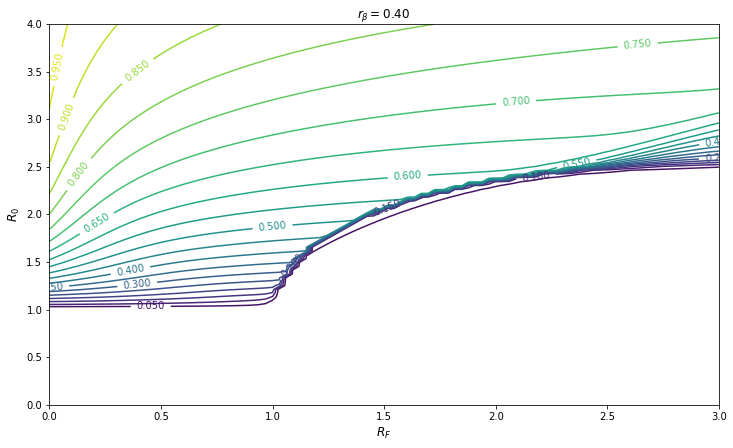

In [ ]:
fig, ax = plt.subplots()
cs = ax.contour(X, Y, z, levels=20)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_title(r"$r_{\beta} = %1.2f$" % r_b)
ax.set_xlabel('$R_F$', size=12)
ax.set_ylabel('$R_0$', size=12)